Ejercicio de Práctica

Usando el siguiente dataset:

1. Aplicar prueba de independencia entre las dos variables.
2. Aplicar prueba de bondad de ajuste a la variable de tipo de publicidad
3. Concluir si hay relación y cómo eso podría afectar un futuro modelo de clasificación.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
publicidades_compras = pd.DataFrame({
    'tipo_publicidad': np.random.choice(["Buena","Mala","Regular"], 100, p=[0.4, 0.2, 0.4]),
    'compra': np.random.choice(["Si","No"], 100, p=[0.5, 0.5]),
})

In [3]:
publicidades_compras_conteos = pd.crosstab(publicidades_compras['tipo_publicidad'], publicidades_compras['compra'])
publicidades_compras_conteos

compra,No,Si
tipo_publicidad,,
Buena,19,26
Mala,7,15
Regular,14,19


In [6]:
# Tabla de contingencia
publicidades_compras_conteos = pd.crosstab(publicidades_compras['tipo_publicidad'], publicidades_compras['compra'])
print(publicidades_compras_conteos)

compra           No  Si
tipo_publicidad        
Buena            19  26
Mala              7  15
Regular          14  19


In [7]:
# Prueba Chi² de independencia
chi2, p, dof, expected = chi2_contingency(publicidades_compras_conteos)
print(f"\nEstadístico Chi²: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("➡ Hay evidencia estadística de que el tipo de publicidad está relacionado con la compra.")
else:
    print("➡ No hay evidencia suficiente para afirmar que el tipo de publicidad influye en la compra.")


Estadístico Chi²: 0.7870
Valor p: 0.6747
➡ No hay evidencia suficiente para afirmar que el tipo de publicidad influye en la compra.


In [8]:
# Frecuencias observadas
observado = publicidades_compras['tipo_publicidad'].value_counts().sort_index()

# Frecuencias esperadas (si suponemos que deberían ser iguales)
esperado = [len(publicidades_compras)/3] * 3  # 3 categorías

# Prueba Chi² de bondad de ajuste
test = chisquare(f_obs=observado, f_exp=esperado)

print("--- Prueba de bondad de ajuste (Chi² tipo_publicidad) ---")
print(f"Chi²: {test.statistic:.4f}")
print(f"Valor p: {test.pvalue:.4f}")

if test.pvalue < 0.05:
    print("➡ La distribución observada difiere de lo esperado.")
else:
    print("➡ No hay diferencia significativa.")

--- Prueba de bondad de ajuste (Chi² tipo_publicidad) ---
Chi²: 7.9400
Valor p: 0.0189
➡ La distribución observada difiere de lo esperado.


C:\Users\vivia\AppData\Local\Temp\ipykernel_30992\137583160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_publicidad', data=publicidades_compras, palette='pastel')


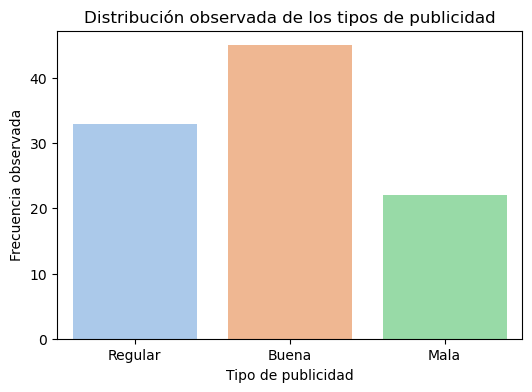

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='tipo_publicidad', data=publicidades_compras, palette='pastel')

plt.title('Distribución observada de los tipos de publicidad')
plt.xlabel('Tipo de publicidad')
plt.ylabel('Frecuencia observada')
plt.show()

Conclusión: No se encontró evidencia de relación entre el tipo de publicidad y la decisión de compra (p = 0.67